#### Steps used:
    
1> Data cleansing and Wrangling
2> Define the metrics for which model is getting optimized.
3> Feature Engineering
4> Data Pre-processing
5> Feature Selection
6> Split the data into training and test data sets.
7> Model Selection
8> Model Validation 
9> Interpret the result
10> save Model
11> reload model for prediction of test .csv
12>do data cleaning for test.csv
13> predict Fees

# Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('flight_price\Data_Train.csv')

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### This problem is solved using Linear Regression

In [5]:
data.shape

(10683, 11)

In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## EDA process

In [7]:
data.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Min - Max: As there is alot of diffrence between min-max one need to do is scaling of data.

### Checking Null values

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observation: Route and Total_stops are null, need to handle it

### Categories

In [9]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
print("Number of Categories: ")
for ColName in data[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))


Number of Categories: 
Airline = 12
Date_of_Journey = 44
Source = 5
Destination = 6
Route = 129
Dep_Time = 222
Arrival_Time = 1343
Duration = 368
Total_Stops = 6
Additional_Info = 10
Price = 1870


# Visualization of categories and data

For categorical data we can use: counterplot and for numerical data we can use: distplot 

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


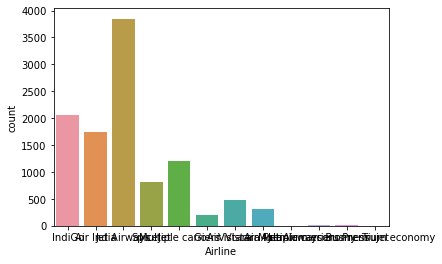

In [12]:
import seaborn as sns
alpha = sns.countplot(x="Airline",data=data,dodge=False)
print(data["Airline"].value_counts())

Maximum Flights taken by customer is Jet Airways

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


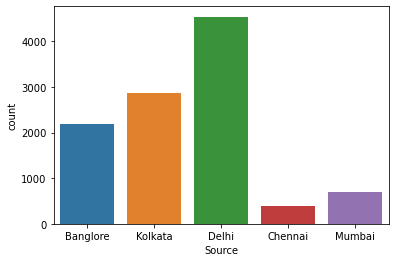

In [14]:

alpha = sns.countplot(x="Source",data=data)
print(data["Source"].value_counts())

Max flights are been taken off from Delhi

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


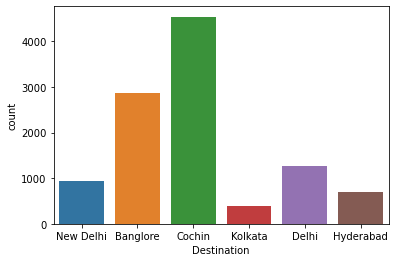

In [15]:

alpha = sns.countplot(x="Destination",data=data)
print(data["Destination"].value_counts())

There are 6 places as destination. and max flights are been destined to Cochin

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → DED → DEL → HYD             1
BOM → RPR → VTZ → HYD             1
BLR → HBX → BOM → BHO → DEL       1
BOM → NDC → HYD                   1
BOM → GOI → HYD                   1
Name: Route, Length: 128, dtype: int64


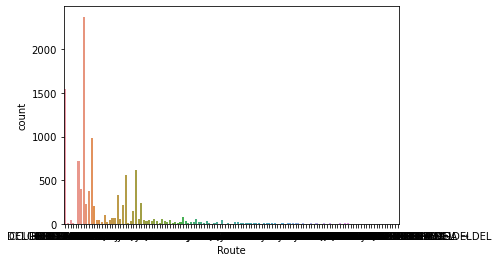

In [16]:

alpha = sns.countplot(x="Route",data=data)
print(data["Route"].value_counts())

There are numerous routes covered by our Flights

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
32h 55m      1
27h 30m      1
13h 35m      1
29h 40m      1
42h 5m       1
Name: Duration, Length: 368, dtype: int64


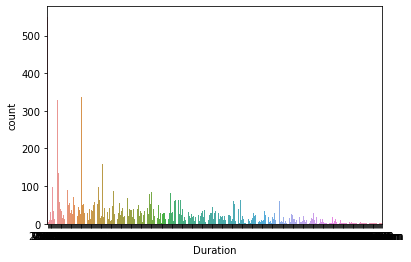

In [19]:

alpha = sns.countplot(x="Duration",data=data)
print(data["Duration"].value_counts())

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


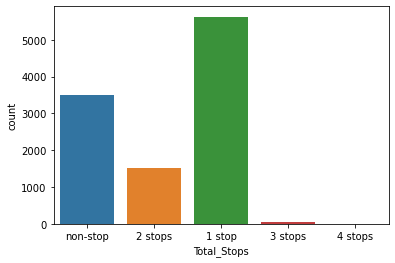

In [20]:

alpha = sns.countplot(x="Total_Stops",data=data)
print(data["Total_Stops"].value_counts())

In most of the flights there are only 1 Stops

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64


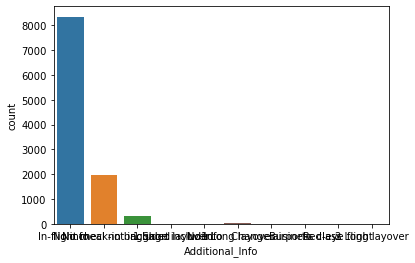

In [21]:

alpha = sns.countplot(x="Additional_Info",data=data)
print(data["Additional_Info"].value_counts())

### Handling null value

In [22]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [23]:
#1. Function to replace NAN values with mode value this both rows are categorical,
#not numeric based with datatype of float or int
def impute_nan_most_frequent_category(data,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=data[ColName].mode()[0]
    
    # replace nan values with most occured category
     #data[ColName + "_Imputed"] = data[ColName]
     #data[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
     data[ColName] = data[ColName]
     data[ColName].fillna(most_frequent_category,inplace=True)

In [24]:
#2. Call function to impute most occured category
for Columns in ['Route','Total_Stops']:
    impute_nan_most_frequent_category(data,Columns)
    
# Display imputed result
data[['Route','Total_Stops']].head(10)

,Route,Total_Stops
0,BLR → DEL,non-stop
1,CCU → IXR → BBI → BLR,2 stops
2,DEL → LKO → BOM → COK,2 stops
3,CCU → NAG → BLR,1 stop
4,BLR → NAG → DEL,1 stop
5,CCU → BLR,non-stop
6,BLR → BOM → DEL,1 stop
7,BLR → BOM → DEL,1 stop
8,BLR → BOM → DEL,1 stop
9,DEL → BOM → COK,1 stop


In [25]:
#Rechecking null values in dataset 
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Observation: Null values are handled

# Data Cleaning

### Skewness

In [26]:
data.skew()

Price    1.812552
dtype: float64

### Outliers

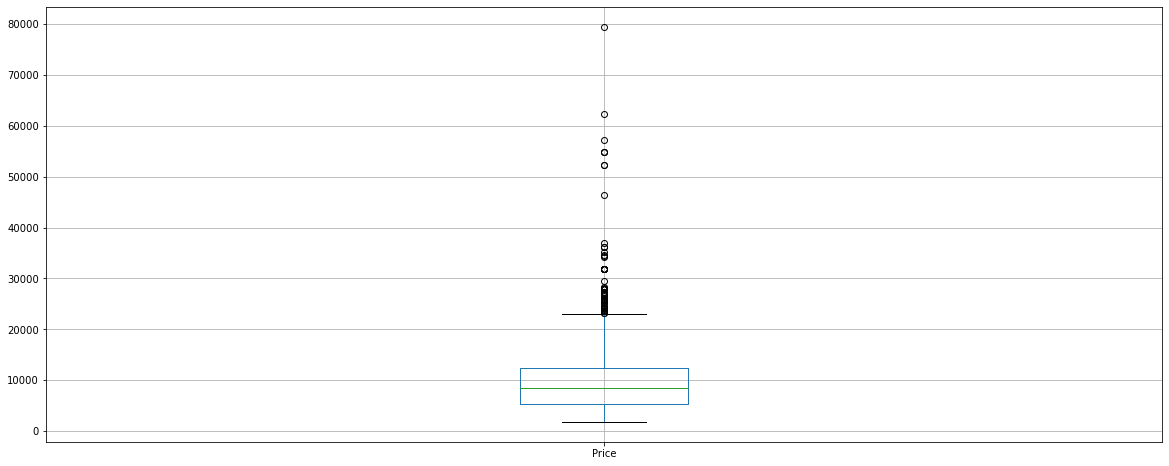

In [27]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.show()

In [28]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Observation: Here all the columns are categorical type and target value is int but as there  are all feature variable as  categorical data , there is no need to hangle skewness .

# Data Encoding

As the data are categorical, so need to encode the data.

In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [30]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [31]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,183.0,1259.0,236.0,4.0,8.0,4107
10679,1.0,29.0,3.0,0.0,64.0,193.0,1305.0,237.0,4.0,8.0,4145
10680,4.0,29.0,0.0,2.0,18.0,58.0,824.0,280.0,4.0,8.0,7229
10681,10.0,0.0,0.0,5.0,18.0,92.0,938.0,238.0,4.0,8.0,12648


# Corelation of data with the target variable

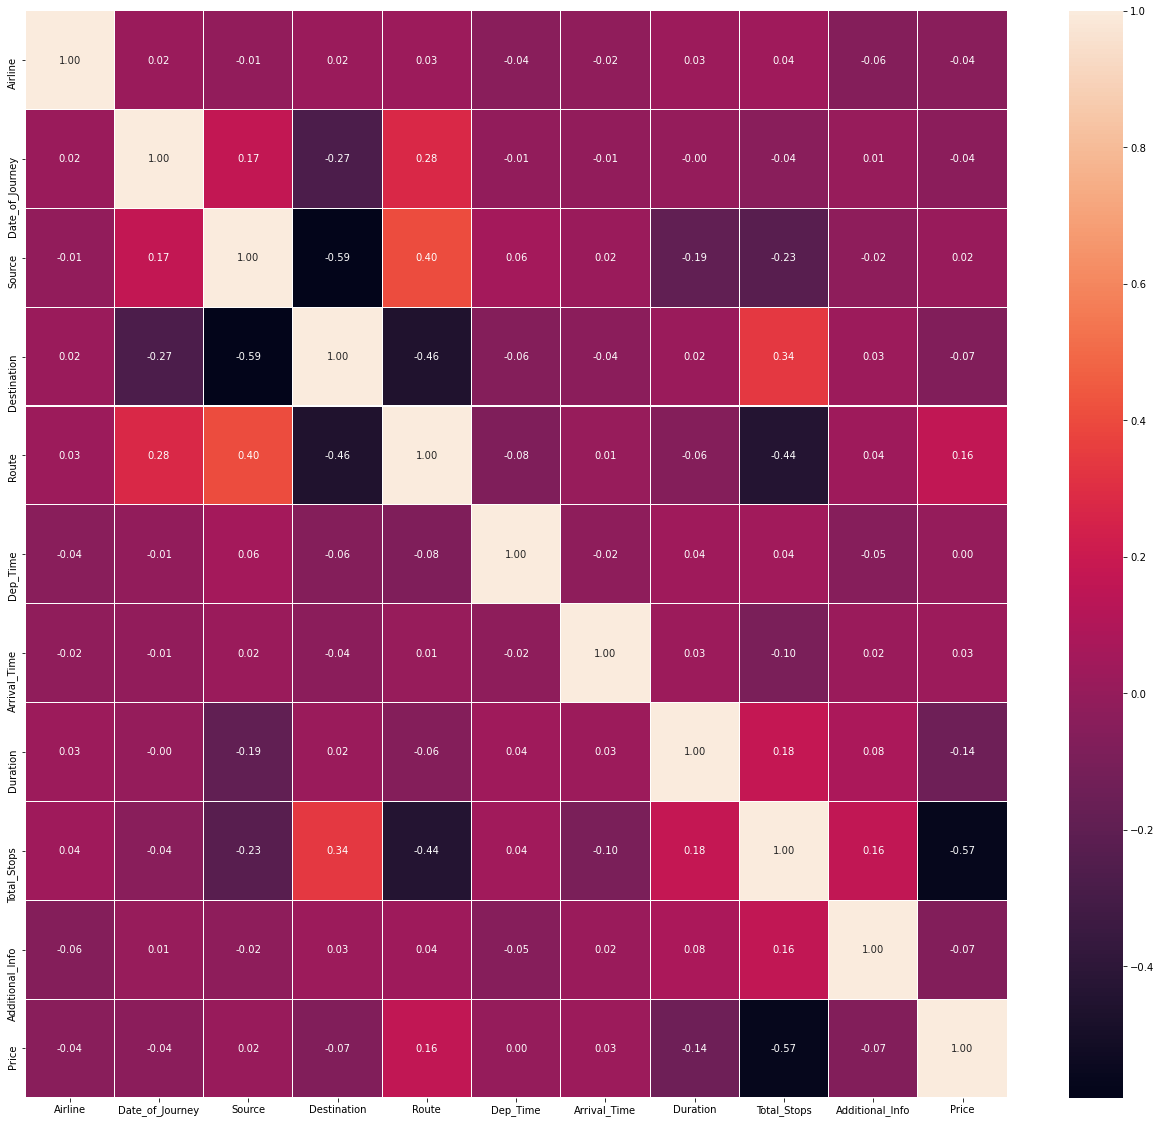

In [32]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [33]:
corr_matrix_hmap["Price"].sort_values(ascending=False)

Price              1.000000
Route              0.164118
Arrival_Time       0.027377
Source             0.015998
Dep_Time           0.002949
Date_of_Journey   -0.036942
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
Total_Stops       -0.571174
Name: Price, dtype: float64

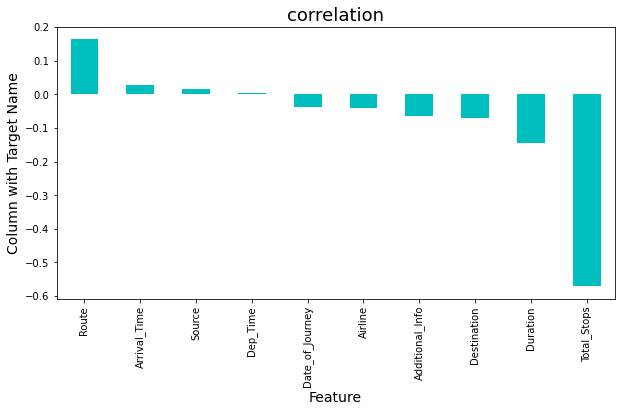

In [35]:
plt.figure(figsize=(10,5))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Maximum corelated with price: Route (Which route is choosen will affect the price majorly)
    

Minimun corelated with price: Departure Time (Dep_Time)

Negatively corelated with price: Total_stops during the journey

# Seperating Independent variable and Target Variable

In [36]:
# x= independent variable
x = data.iloc[:,0:-1]
x.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0


In [37]:
#y = target variable = Fees 
y = data.iloc[:,-1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [38]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302


In [39]:
x.shape

(10683, 10)

In [40]:
y.shape

(10683,)

## SCALING the data using Min-Max Scaler

In [41]:
data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


As there is diffrence between MIN-MAX will SCALE our data

In [42]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [43]:
data=mms.fit_transform(data)

In [44]:
data

array([[0.27272727, 0.55813953, 0.        , ..., 1.        , 0.88888889,
        0.02749733],
       [0.09090909, 0.13953488, 0.75      , ..., 0.25      , 0.88888889,
        0.0759199 ],
       [0.36363636, 1.        , 0.5       , ..., 0.25      , 0.88888889,
        0.15591681],
       ...,
       [0.36363636, 0.6744186 , 0.        , ..., 1.        , 0.88888889,
        0.07035098],
       [0.90909091, 0.        , 0.        , ..., 1.        , 0.88888889,
        0.14004604],
       [0.09090909, 0.97674419, 0.5       , ..., 0.25      , 0.88888889,
        0.12853523]])

# Model Training

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state = 42)

In [46]:
x_train.shape

(7478, 10)

In [47]:
y_train.shape

(7478,)

In [48]:
x_test.shape

(3205, 10)

In [49]:
y_test.shape

(3205,)

In [50]:
data.shape

(10683, 11)

## Finidng Best Random State

In [53]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    mse = r2_score(y_test,predrf)
    if mse > maxAccu:
        maxAccu = mse
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)
    
    
    

Best score is:  0.3979490731572288 on Random_state 192


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state = 192)

In [56]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)


In [57]:
print('r2 Score:',r2_score(y_test,predrf))

r2 Score: 0.3979490731572288


In [58]:
pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
maxAccu=0
maxRS=0

from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
        
    
    
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 cv score is 0.35288370540791536 and accuracy score training is 0.33592096537956095 and accuracy for the testing is 0.3979490731572288


At cross fold 3 cv score is 0.3528976123465985 and accuracy score training is 0.33592096537956095 and accuracy for the testing is 0.3979490731572288


At cross fold 4 cv score is 0.35290606040083605 and accuracy score training is 0.33592096537956095 and accuracy for the testing is 0.3979490731572288


At cross fold 5 cv score is 0.35269414671017374 and accuracy score training is 0.33592096537956095 and accuracy for the testing is 0.3979490731572288


At cross fold 6 cv score is 0.3529205274514499 and accuracy score training is 0.33592096537956095 and accuracy for the testing is 0.3979490731572288


At cross fold 7 cv score is 0.35322696744911225 and accuracy score training is 0.33592096537956095 and accuracy for the testing is 0.3979490731572288


At cross fold 8 cv score is 0.3530081045294392 and accuracy score training is 0.3359209653

#### Observation: As At Fold 5, the diffrence between cross validation score and accuracy is least, will choose fold 5

# Regularization

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [60]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [61]:
#Lasso tries to ommit coefficient value (the value which dont affect y)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [64]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.3979528545291722

In [66]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(ls,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.35269433915721615

# Ensemble Technique

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf = RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [71]:
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=6)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)



R2 Score: 88.04713778420965
Cross Validation Score: 86.11441392346396


# Saving Model

In [72]:
import pickle
filename = "flights.pkl"
pickle.dump(rf,open(filename,"wb"))


In [73]:
loaded_model=pickle.load(open('flights.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8804713778420965


In [74]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525
Predicted,6142.9,3832.7,4839.13,9319.12,6432.26,11285.13,12824.77,4756.84,3903.91,11574.06,...,6626.76,12217.721833,4174.34,10769.49625,4335.62,3842.92,4518.19,8576.97,6749.631667,15232.31
Original,6142.9,3832.7,4839.13,9319.12,6432.26,11285.13,12824.77,4756.84,3903.91,11574.06,...,6626.76,12217.721833,4174.34,10769.49625,4335.62,3842.92,4518.19,8576.97,6749.631667,15232.31


# Test Dataset

In [75]:
df = pd.read_csv('flight_price\Test_set.csv')

In [76]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [77]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [78]:
df.shape

(2671, 10)

In [79]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

# Data Cleaning

In [80]:
print("Number of Categories: ")
for ColName in df[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']]:
    print("{} = {}".format(ColName,len(df[ColName].unique())))

Number of Categories: 
Airline = 11
Date_of_Journey = 44
Source = 5
Destination = 6
Route = 100
Dep_Time = 199
Arrival_Time = 704
Duration = 320
Total_Stops = 5
Additional_Info = 6


In [81]:
#checking null values in dataset 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### There are no null data

# Encoding data

In [82]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [83]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [84]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,170.0,617.0,150.0,0.0,5.0
2667,3.0,28.0,3.0,0.0,43.0,106.0,507.0,213.0,4.0,5.0
2668,4.0,36.0,2.0,1.0,76.0,183.0,151.0,278.0,0.0,5.0
2669,1.0,36.0,2.0,1.0,76.0,11.0,577.0,60.0,0.0,5.0


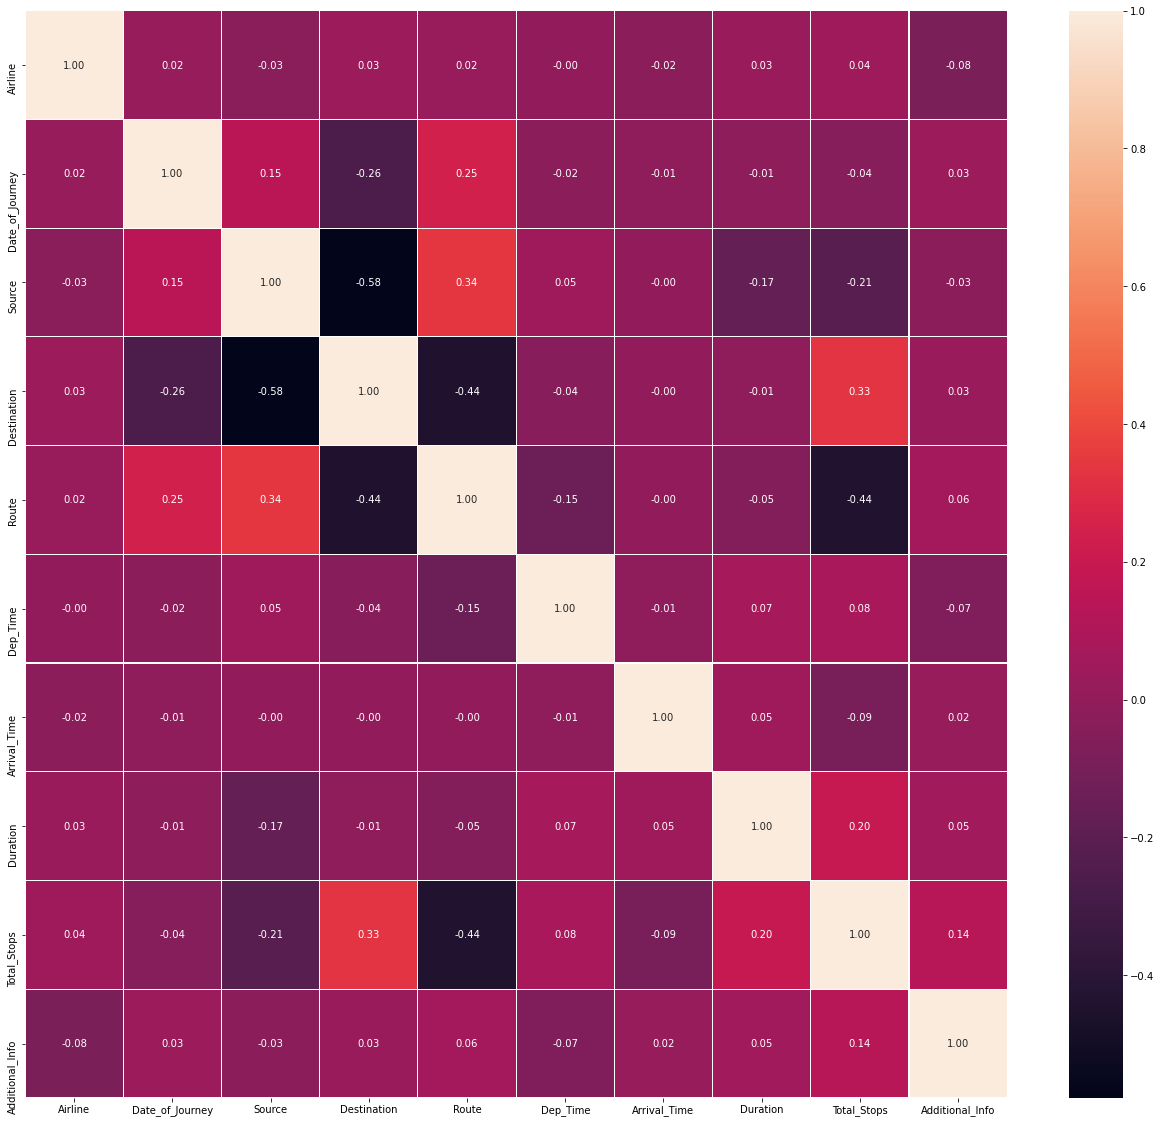

In [85]:
corr_matrix_hmap=df.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [86]:
test_data = df.iloc[:,0:]
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0


# Load Saved Model

In [88]:
loaded_model=pickle.load(open('flights.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8804713778420965


In [89]:
conclusion = pd.DataFrame([loaded_model.predict(test_data)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525
Predicted,10052.87,7586.4,12554.837333,9622.60,6090.04,12287.884,8789.82,7446.41,4859.64,9486.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,6142.90,3832.7,4839.130000,9319.12,6432.26,11285.130,12824.77,4756.84,3903.91,11574.06,...,6626.76,12217.721833,4174.34,10769.49625,4335.62,3842.92,4518.19,8576.97,6749.631667,15232.31


In [90]:
fees =  pd.DataFrame([loaded_model.predict(test_data)[:]])

In [91]:
fees

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
0,10052.87,7586.4,12554.837333,9622.6,6090.04,12287.884,8789.82,7446.41,4859.64,9486.18,...,10776.486,4533.185,7438.07,9033.985,4624.785,9290.67,5016.21,10519.83,10218.16,9532.606667


In [92]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [93]:
df.insert(10, " Fees", fees.values.reshape(-1,1)) 

In [94]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Fees
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0,10052.870000
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0,7586.400000
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0,12554.837333
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0,9622.600000
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0,6090.040000
...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,170.0,617.0,150.0,0.0,5.0,9290.670000
2667,3.0,28.0,3.0,0.0,43.0,106.0,507.0,213.0,4.0,5.0,5016.210000
2668,4.0,36.0,2.0,1.0,76.0,183.0,151.0,278.0,0.0,5.0,10519.830000
2669,1.0,36.0,2.0,1.0,76.0,11.0,577.0,60.0,0.0,5.0,10218.160000


#### so Fees in the above df are the predicted values for the test data set with accuracy rate of 88%